# PHAS0029 Final Assignment: Solving the Quantum-Mechanical Problem of a Particle in an Infinite Square Well and Extending for other Potentials

## Introduction:
In this notebook, we will solve the Schrodinger equation for an infinite square potential well and check our results with the known solutions. Then we can extend this solution for systems where there is no simple analytical solution.

In [284]:
### Importing relevant modules ###

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

## Infinite Square Well

By knowing that the particle will never be outside the well, we can set the potential V(x) = 0 inside the well and ignore V(x) outside the well.

In [285]:
### Defining physical constants ###

m = 9.109383702*10**(-31) # mass of an electron in kg
h_bar = 1.054571817*10**(-34) # reduced Planck constant in J/s
e = 1.602176634*10**(-19) # charge of an electron in C

### Making the well ###

a = 5*10**(-11) # half-width of the well in metres
N = 1000 # number of Runge-Kutta calculation points

def V(x):
    return 0.0 #setting up potential

Next we can split the Schrödinger equation into 2 first order differential equations:

$$
\frac{d \psi}{dx } = \phi, \\
\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x),
$$

We can use a function to implement these in code.

In [286]:
def rhs(r,x,E):
    '''Implementation of 2 first order differential equations derived from Schrodinger equation.
    Inputs: r: array of values containing value of psi and phi
            x: x-value
            E: energy value
    Outputs: fpsi: derivative of psi
             fphi: derivative of phi'''
    psi = r[0] # first element of r represents psi
    phi = r[1] # second element of r represents phi
    fpsi = phi
    fphi = ((2*m)/(h_bar)**2)*(V(x)-E)*(psi)
    return np.array([fpsi,fphi],float) # convert fpsi and fphi to an array form and ensure it's a float

Now we need to make a RungeKutta function that iterates over xpoints beginning at x = -a and ending at x = a, we also need to choose some initial conditions, r , which are $\psi$ = 0 and $\phi$ = 1. We could have chosen any value for $\phi$ as it only represents the gradient of the wavefunction so it multiplies all the points on it by a constant factor. Therefore when we normalise the wavefunction, the value of $\phi$ is irrelevant.

In [287]:
def RungeKutta2d(r,xpoints,function,E):
    '''Fourth-order Runge-Kutta rewritten for two or more simultaneous equations
    Inputs: r: array of values, one for each equation in the system
            xpoints: array of x values.
            function: the function to use to solve the system
    Outputs: [psi_points, phi_points]: solutions for psi(x) and phi(x), numpy arrays of same length as xpoints'''
    psi_points = [] # initialise empty arrays
    phi_points = []
    for x in xpoints:
        psi_points.append(r[0])
        phi_points.append(r[1])
        # The following is the same as before, with x->r
        # and calling the specified function
        k1 = h*function(r,x,E) 
        k2 = h*function(r+0.5*k1, x+0.5*h,E)
        k3 = h*function(r+0.5*k2, x+0.5*h,E)
        k4 = h*function(r+k3, x+h,E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
            # these next two lines calculate for the point at t = tend!
    psi_points.append(r[0])
    phi_points.append(r[1])
    return np.array([psi_points, phi_points]) # convert output to numpy array with 2 rows and N columns

In [288]:
# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000    # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend+h, h)
r = np.array([0,1])

## Finding the ground state energy

To find a value of E that gives the required $\psi$ = 0 at x = -a, we will use the secant method (from session 10). The first 2 initial guesses should be close to the known ground state energy in order to avoid accidentally calculating the eigenvalue of a higher state. We can check our result is correct by using the analytical solution of the ground state energy:

$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2}
$$

In [289]:
E1 = 5e-30# guess 1 of initial ground state energy in J
E2 = 5e-18 # guess 2 of initial ground state energy in J

n = 1 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3 = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]

E_check = ((np.pi**2)*(h_bar**2)*(n**2))/(2*m*((2*a)**2)) 

print('The analytical solution for the first excited state is',E_check,'J')
    
print('The ground state energy that fulfills the boundary conditions is',E3,'J')

The analytical solution for the first excited state is 6.024667394524027e-18 J
The ground state energy that fulfills the boundary conditions is 6.0246673945814986e-18 J


## Finding the ground state wavefunction

Now we can plot the ground state wavefunction onto the infinite square well using our RungeKutta to give us every psi-point and our xpoints array now has N + 1 elements so that both arrays are of the same size.

<IPython.core.display.Javascript object>


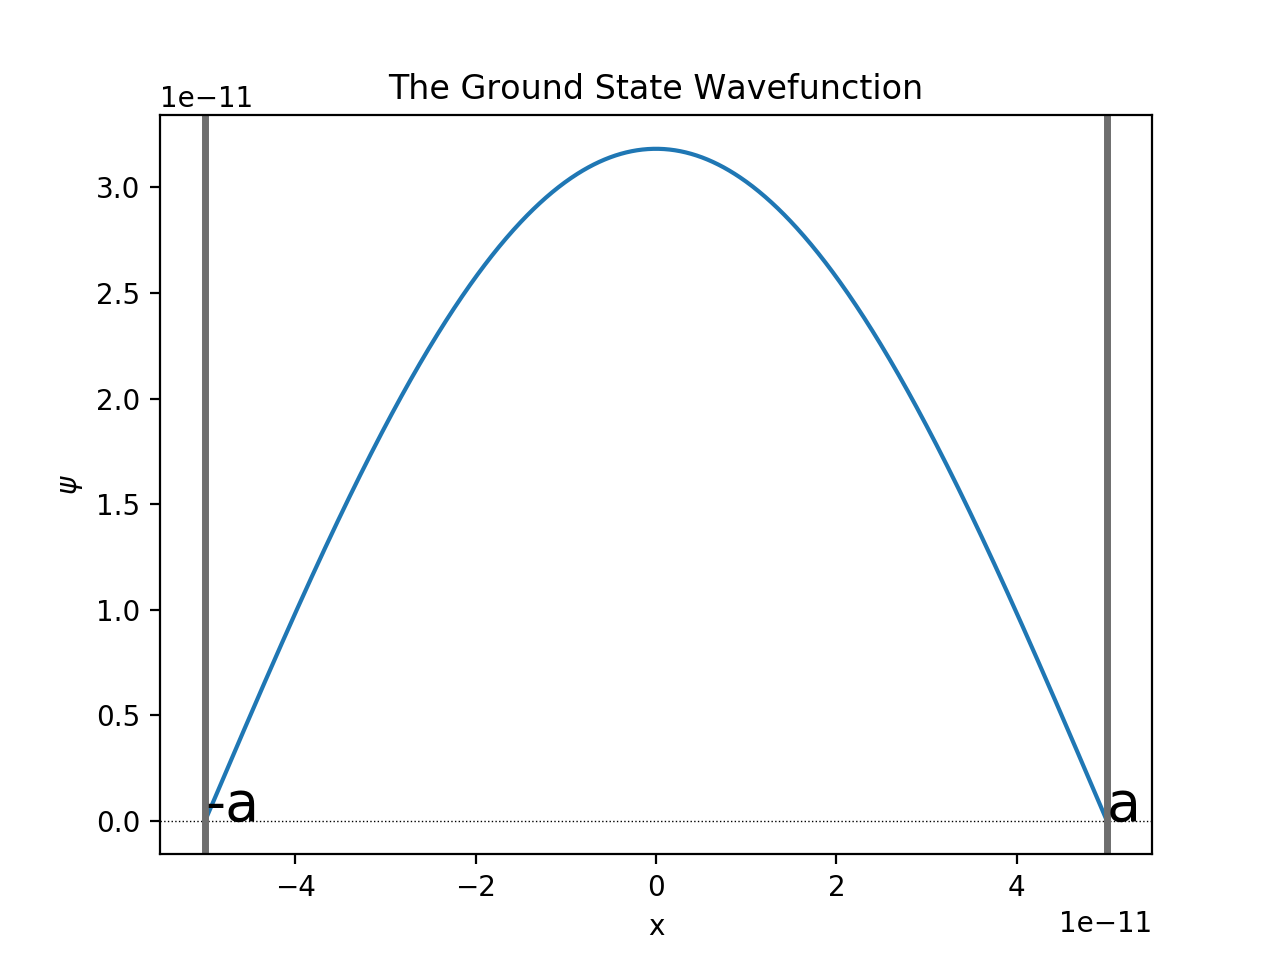

The area under the curve is 2.0264220061620867e-21


In [290]:
xplotpoints = np.arange(xstart, xend+h, h)

bestsoln = RungeKutta2d([0, 1],xpoints,rhs,E3)  # call this with the *calculation* tpoints array

# but *plot* it with the new xplotpoints array.
plt.figure()
plt.plot(xplotpoints,bestsoln[0])
#plt.legend()
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("The Ground State Wavefunction")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)
area = np.trapz(bestsoln[0],xplotpoints)
print('The area under the curve is',area)

As it is, our wavefunction is not normalised so we will make a function that normalises it using the Trapezoidal Rule:

$$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{n-1}f(x + kh) \right]
$$

This will enable us to find the integral on the left hand side of this equation:

$$
\int_{-\infty}^{\infty} | \psi(x) |^2 {\rm d} x = 1
$$

We can then divide every point on the wavefunction by this calculated integral value which will normalise it.

The value of the integral is 5.06605918204847e-32


<IPython.core.display.Javascript object>


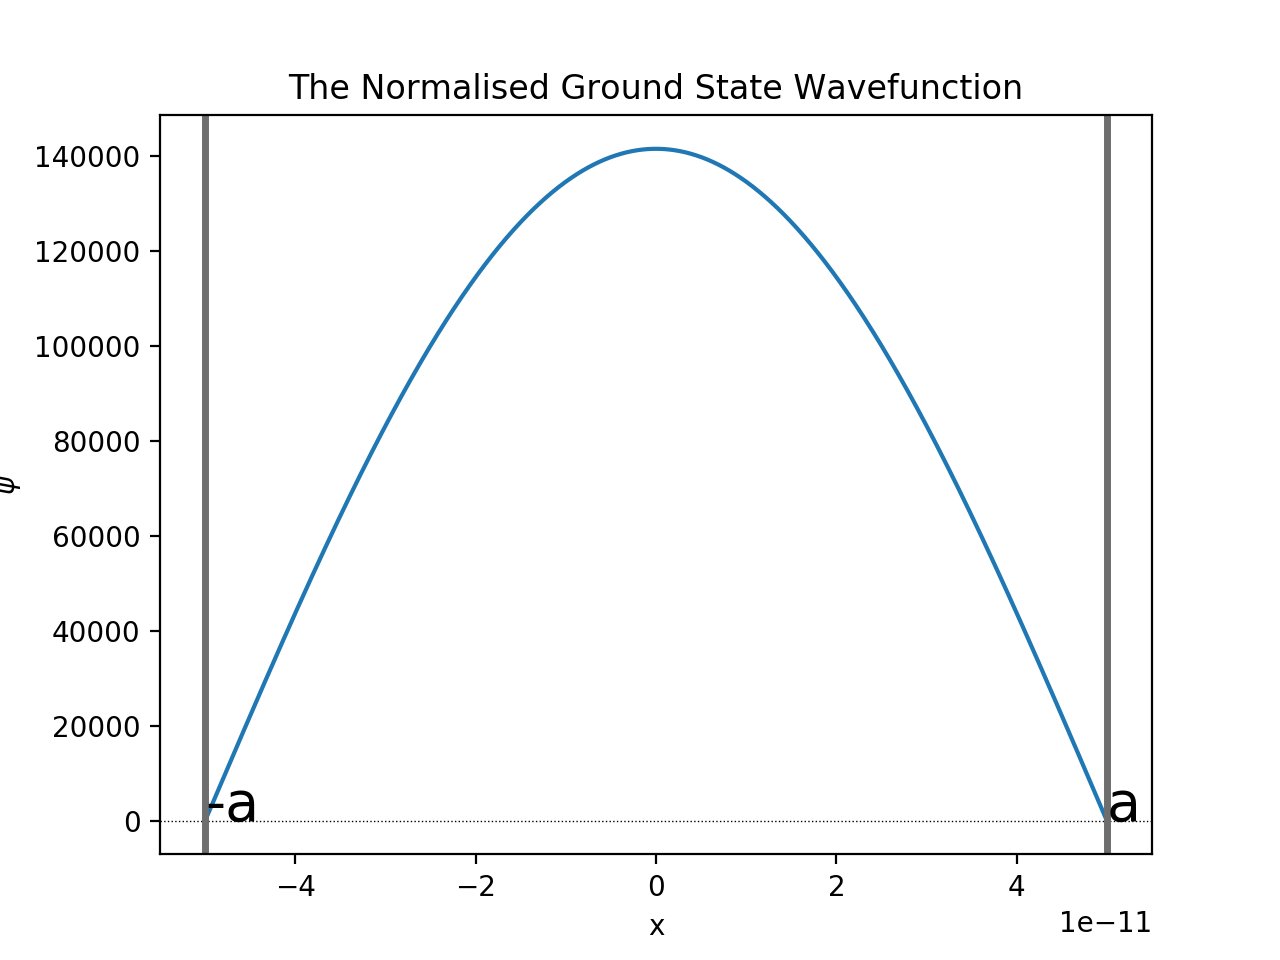

The area under the curve is 9.003155756746978e-06


In [291]:
### Normalising the wave function ###

def Trapezoidal(points, A, B, n):
    h = (B-A)/float(n) #h represents dx
    s = 0.5*((points[0])**2 + (points[n])**2) #1/2 f(a) plus f(b)
    #print(points[n-1]**2)
    for i in range(1,n,1):
        s = s + (points[i])**2 #loop gets the sum part of the equation
    #print(s)
    T = h*s #total integral of squared wavefunction
    print('The value of the integral is',T)
    nwf = points/np.sqrt(T) #new wavefunction points
    return nwf

norm_wavefunction = Trapezoidal((bestsoln[0]),-a,a,N)

plt.figure()
plt.plot(xplotpoints,norm_wavefunction)
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("The Normalised Ground State Wavefunction")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)

area = np.trapz(norm_wavefunction,xplotpoints)
print('The area under the curve is',area)

One way to check that it is correctly normalised, is by plotting the square of the wavefunction and calulating the area with np.trapz (a numpy function).

In [292]:
### Normalising the squared wavefunction ###

def Trapezoidal_sq(points, A, B, n):
    h = (B-A)/float(n) #h represents dx
    s = 0.5*((points[0])**2 + (points[n])**2) #to get 1/2 multiplied by f(a) and f(b)
    for i in range(1,n,1):
        s = s + (points[i])**2 #loop used to get sum in equation
    #print(s)
    T = h*s #total integral of squared wavefunction
    print('The value of the integral',T)
    nwf = points**2/T #divide squared wavefunction by value of integral found
    return nwf


The value of the integral 5.06605918204847e-32


<IPython.core.display.Javascript object>


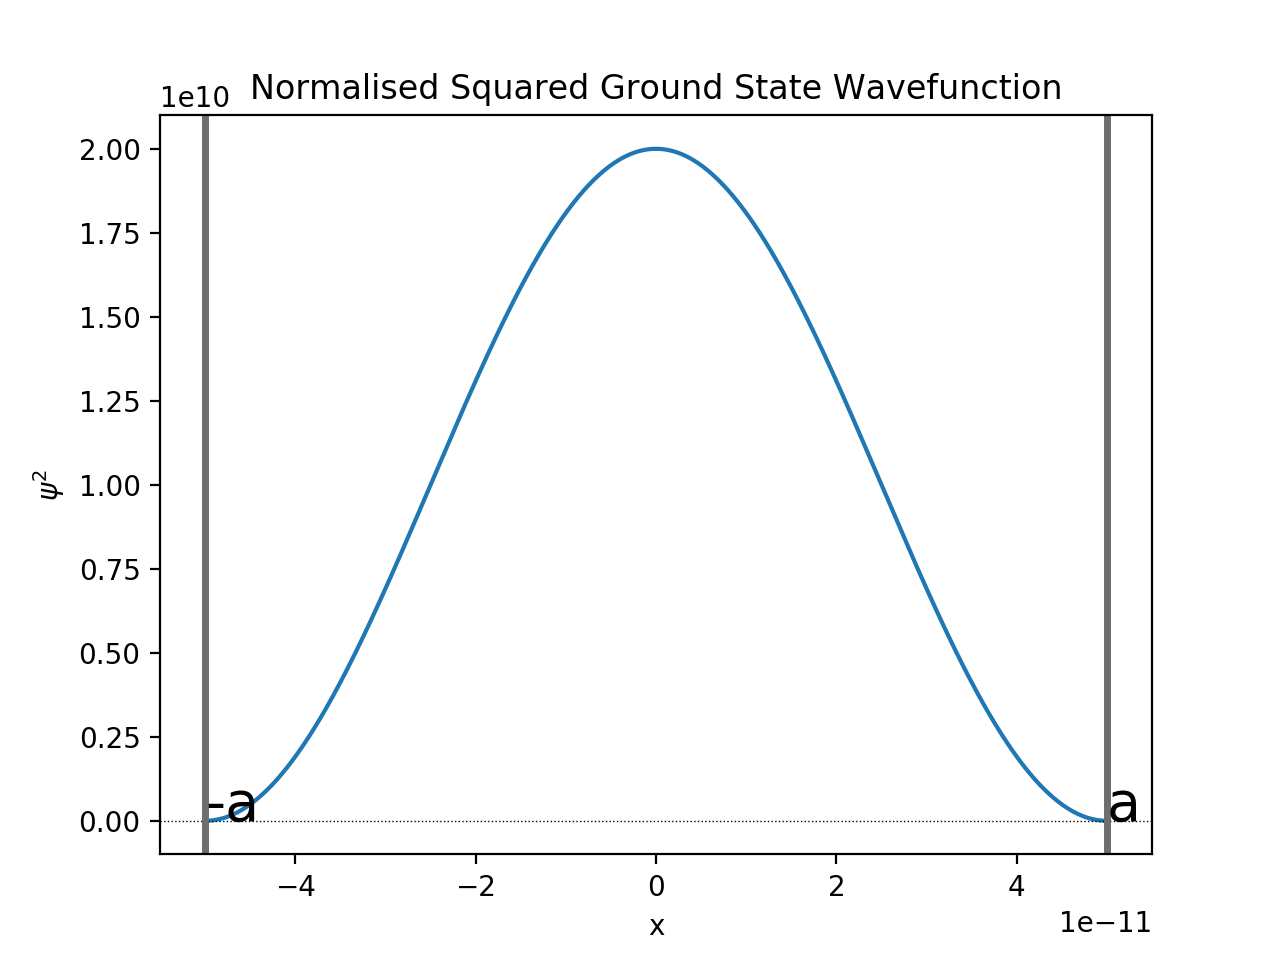

The area under the curve is 0.9999999999999831


In [293]:
norm_wavefunctionsq = Trapezoidal_sq(bestsoln[0],-a,a,N)

plt.figure()
plt.plot(xplotpoints,norm_wavefunctionsq)
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi^2$")
plt.title("Normalised Squared Ground State Wavefunction")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)

area = np.trapz(norm_wavefunctionsq,xplotpoints) #to check area is equal to 1
print('The area under the curve is',area)

The area is indeed found to be 1 but there is another way to check our plot. We can plot the known analytical solutions:

$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{odd}
    $$
    $$
    \psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even}.
$$

In [294]:
### Setting up known normalised ground state function from solutions ###

def knownwf(xpoints):
    V = []
    for x in xpoints:
        V.append((((1/np.sqrt(a))*np.cos((np.pi*x)/(2*a)))))
    return V

<IPython.core.display.Javascript object>


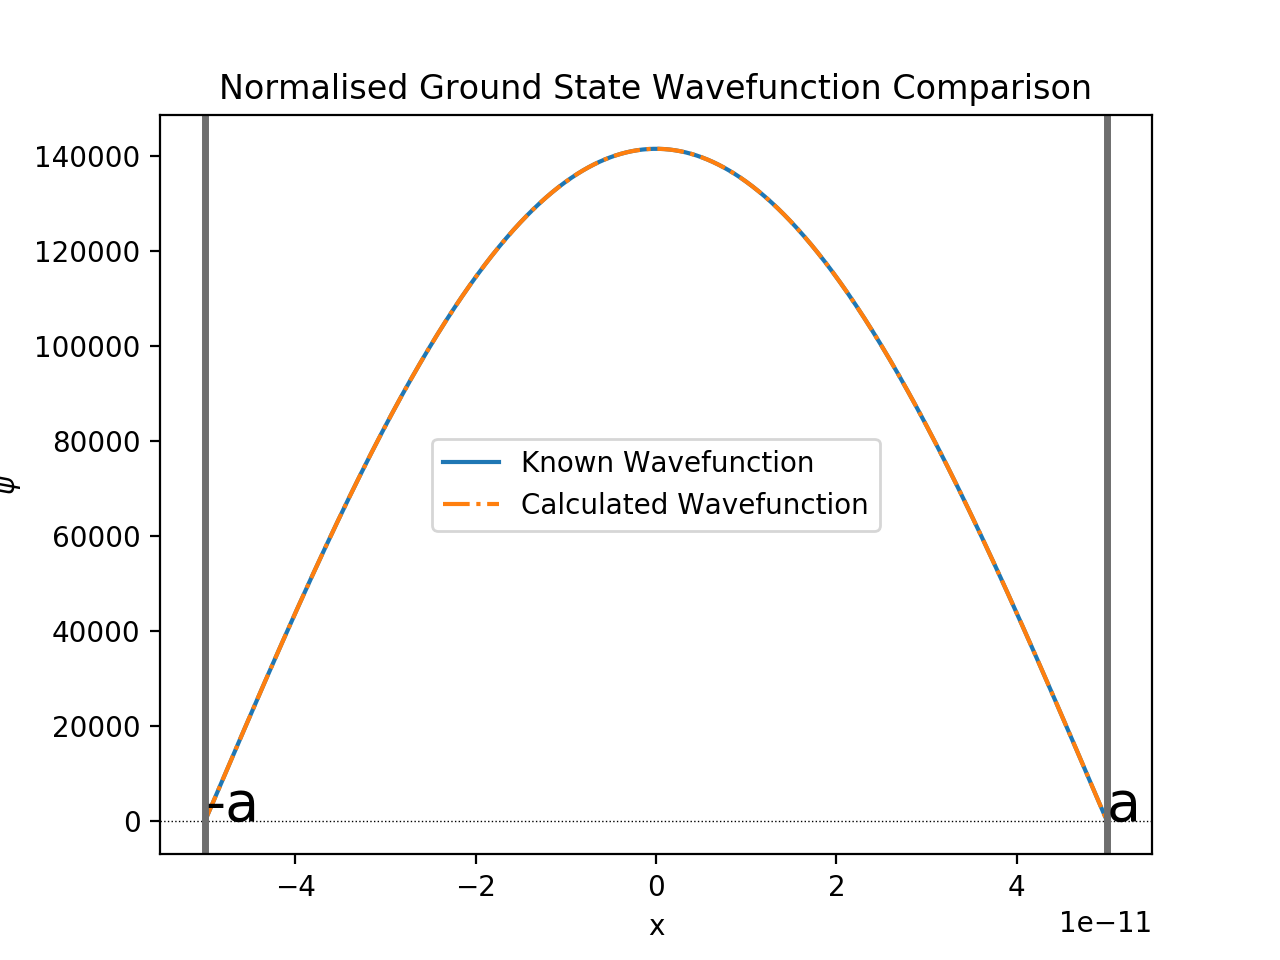

Text(5e-11,0,'a')

In [295]:
plt.figure()
plt.plot(xplotpoints,knownwf(xplotpoints),label ='Known Wavefunction')
plt.plot(xplotpoints,norm_wavefunction,'-.',label = 'Calculated Wavefunction')
plt.legend()
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("Normalised Ground State Wavefunction Comparison")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)

TBC

## Finding higher energy states

We can use the secant method again to find the first few excited states: n = 2,3,4 which we can again plot against the known analytical solutions. This time we need to slighly increase our initial guesses so that we can find higher eigenvalues. Through trial and error we can figure out the eigenvalues for each n.

### n = 2

In [296]:
E1 = 5e-19 # guess 1 of initial first excited state energy in J
E2 = 2e-17 # guess 2 of initial first excited state energy in J

n = 2 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3_first = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3_first
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]

E_check = ((np.pi**2)*(h_bar**2)*(n**2))/(2*m*((2*a)**2)) 

print('The analytical solution for the first excited state is',E_check,'J')
    
print('The first excited state energy that fulfills the boundary conditions is',E3_first,'J')

The analytical solution for the first excited state is 2.409866957809611e-17 J
The first excited state energy that fulfills the boundary conditions is 2.4098669578486155e-17 J


<IPython.core.display.Javascript object>


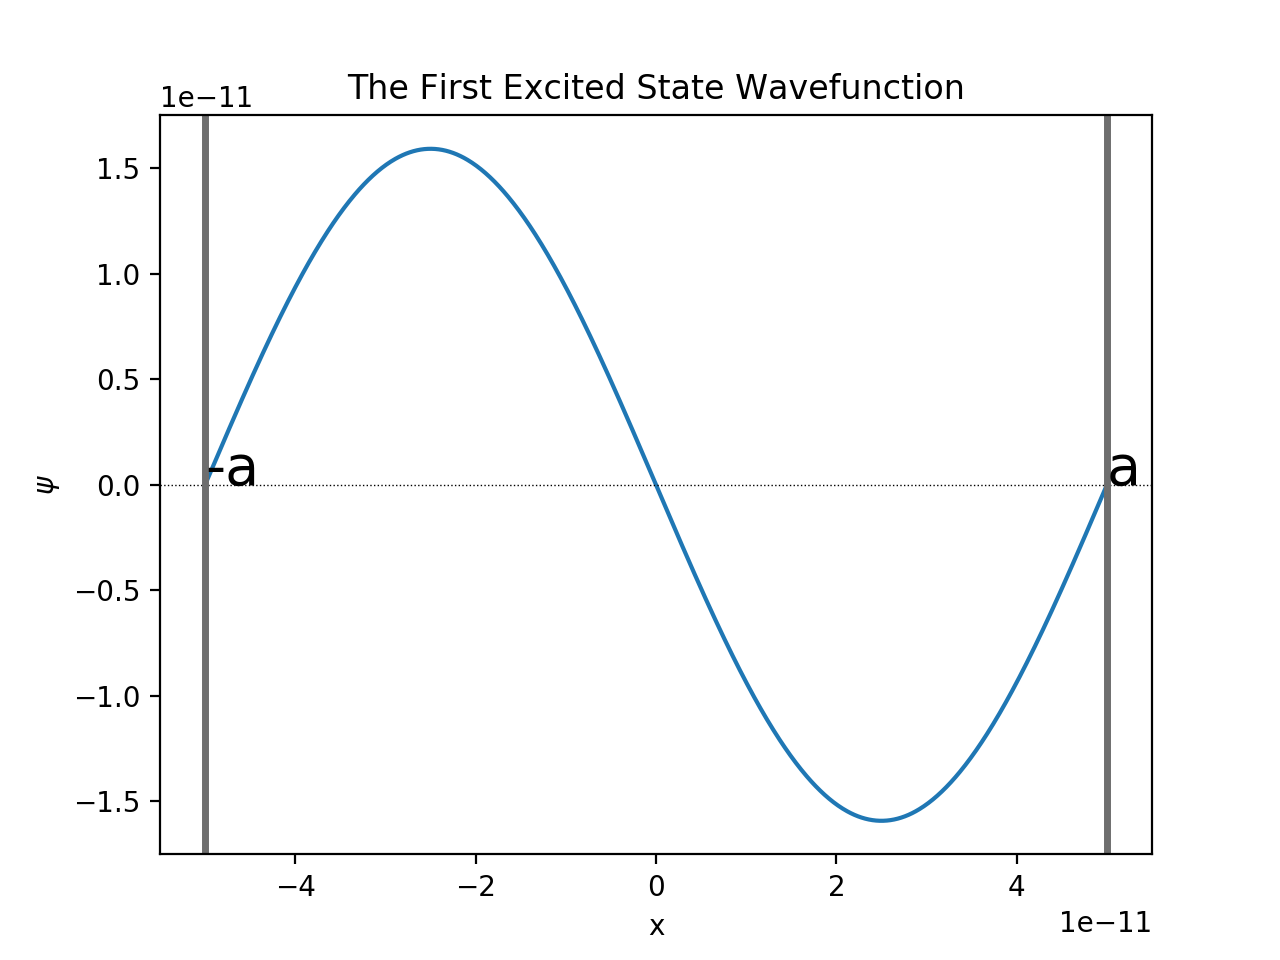

Text(5e-11,0,'a')

In [297]:
xplotpoints = np.arange(xstart, xend+h, h)

bestsoln = RungeKutta2d([0, 1],xpoints,rhs,E3_first)  # call this with the *calculation* tpoints array

# but *plot* it with the new xplotpoints array.
plt.figure()
plt.plot(xplotpoints,bestsoln[0])
#plt.legend()
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("The First Excited State Wavefunction")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)

The value of the integral is 1.2665147955143816e-32


<IPython.core.display.Javascript object>


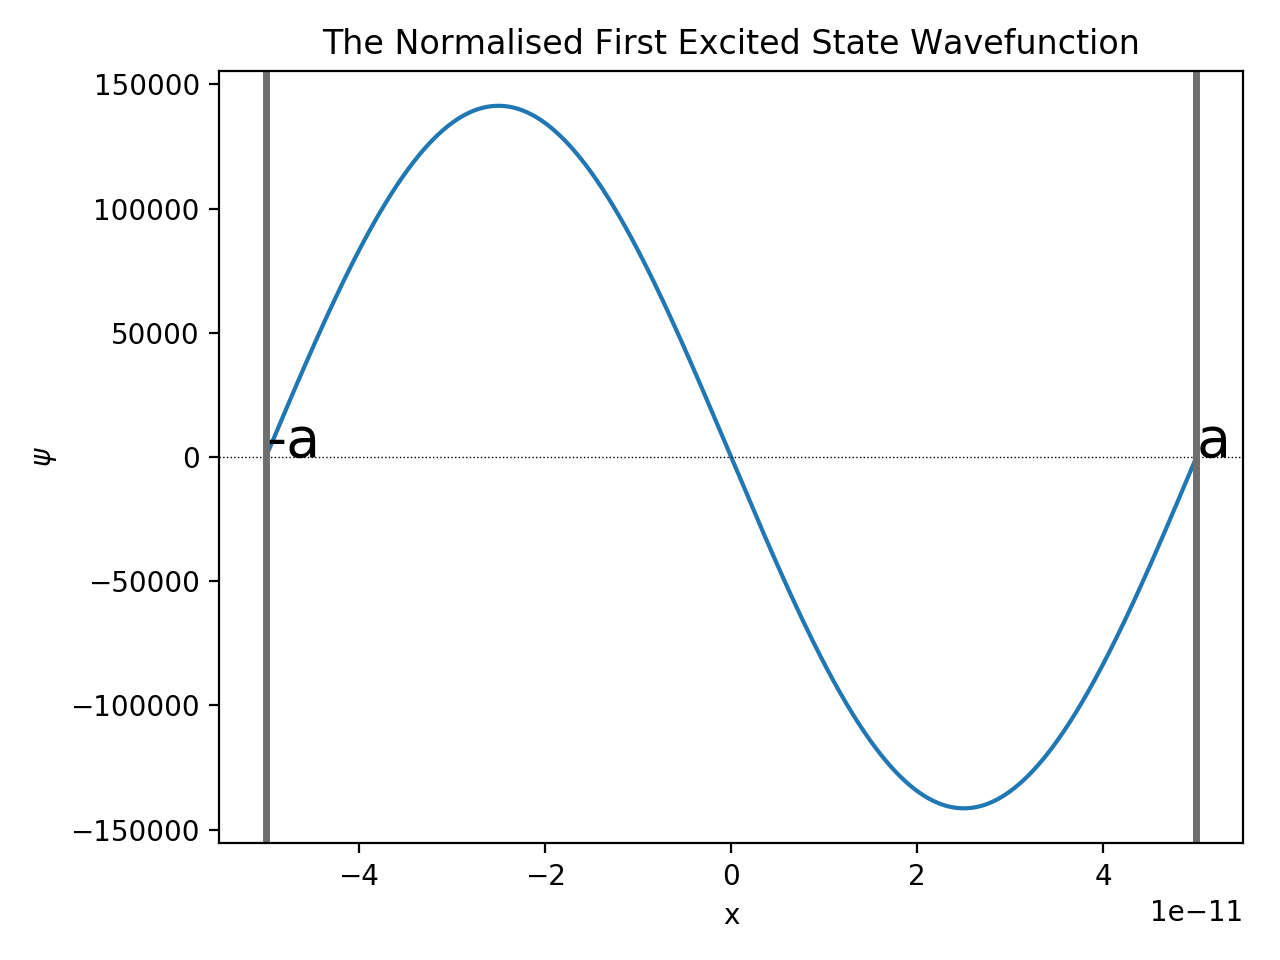

In [298]:
norm_wavefunction = Trapezoidal((bestsoln[0]),-a,a,N)

plt.figure()
plt.plot(xplotpoints,norm_wavefunction)
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("The Normalised First Excited State Wavefunction")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)
plt.tight_layout()

In [299]:
def knownwf2(xpoints):
    V = []
    for x in xpoints:
        V.append((((1/np.sqrt(a))*np.sin((2*np.pi*x)/(2*a)))))
    return V

<IPython.core.display.Javascript object>


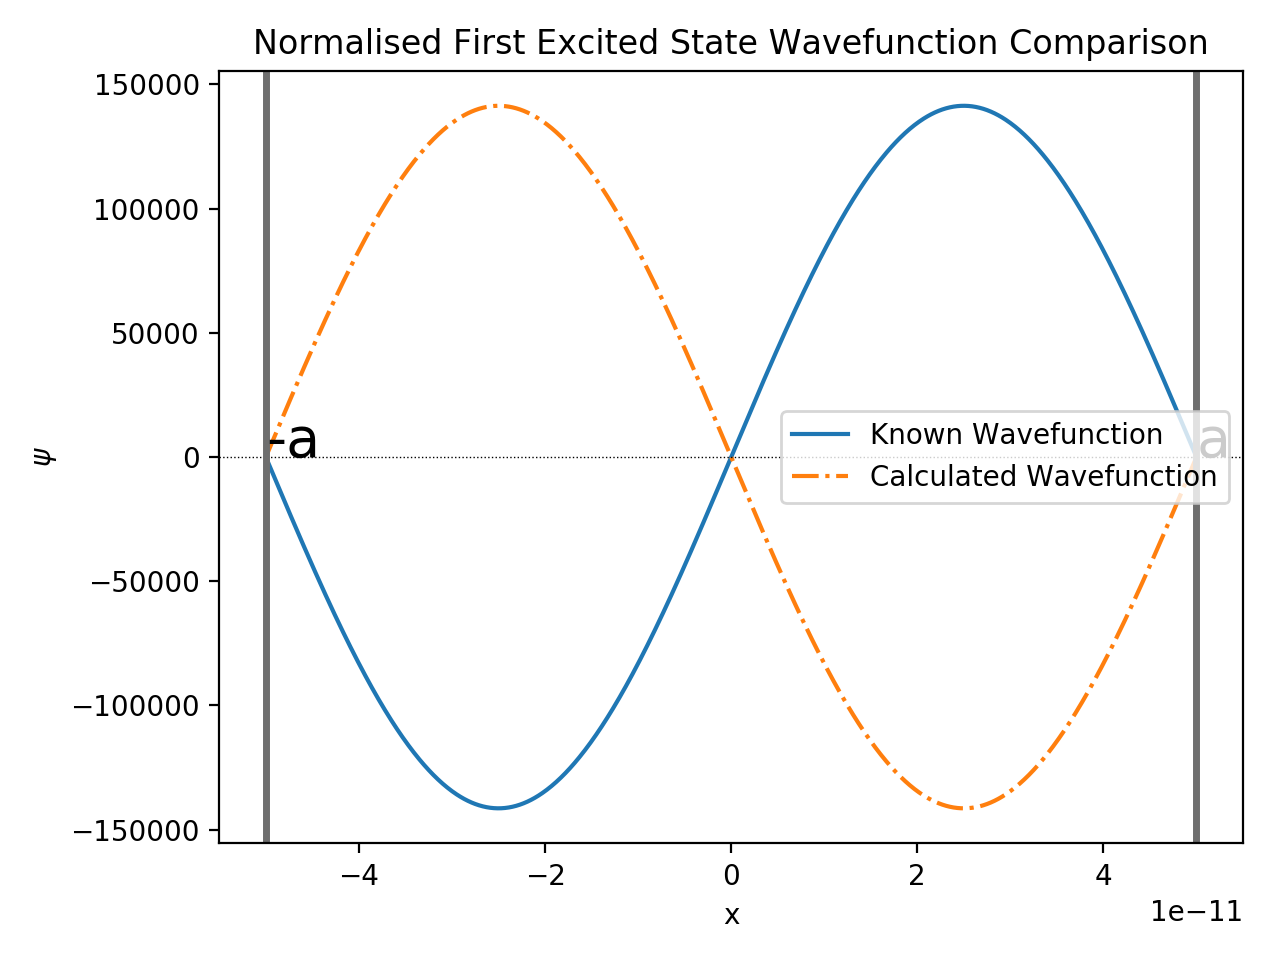

In [300]:
plt.figure()
plt.plot(xplotpoints,knownwf2(xplotpoints),label ='Known Wavefunction')
plt.plot(xplotpoints,norm_wavefunction,'-.',label = 'Calculated Wavefunction')
plt.legend()
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("Normalised First Excited State Wavefunction Comparison")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)
plt.tight_layout()

When we plot the calculated solutions of the first excited state with the known solutions, we notice that the 2 seem just out of phase with each other. This is because x is taken to be from -a to a instead of 0 to 2a which is what the known solutions are plotted for. This happens with the second excited state too. 

### n = 2

In [301]:
E1 = 5e-19 # guess 1 of initial first excited state energy in J
E2 = 5e-17 # guess 2 of initial first excited state energy in J

n = 3 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3_second = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3_second
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]

E_check = ((np.pi**2)*(h_bar**2)*(n**2))/(2*m*((2*a)**2)) 

print('The analytical solution for the second excited state is',E_check,'J')
    
print('The second excited state energy that fulfills the boundary conditions is',E3_second,'J')

The analytical solution for the second excited state is 5.422200655071625e-17 J
The second excited state energy that fulfills the boundary conditions is 5.422200655784985e-17 J


<IPython.core.display.Javascript object>


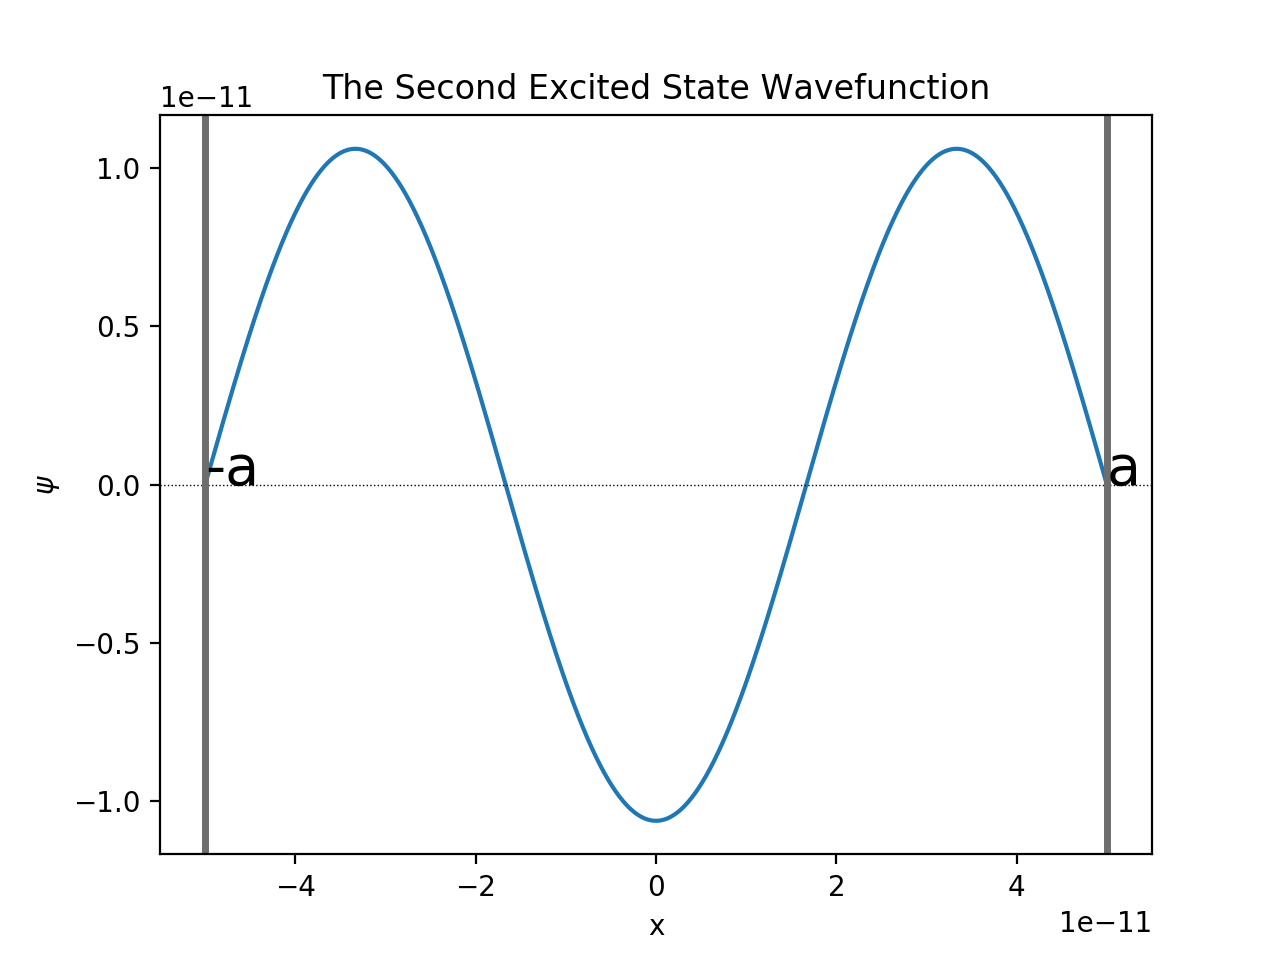

Text(5e-11,0,'a')

In [302]:
xplotpoints = np.arange(xstart, xend+h, h)

bestsoln = RungeKutta2d([0, 1],xpoints,rhs,E3_second)  # call this with the *calculation* tpoints array

# but *plot* it with the new xplotpoints array.
plt.figure()
plt.plot(xplotpoints,bestsoln[0])
#plt.legend()
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("The Second Excited State Wavefunction")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)

The value of the integral is 5.6289546460284e-33


<IPython.core.display.Javascript object>


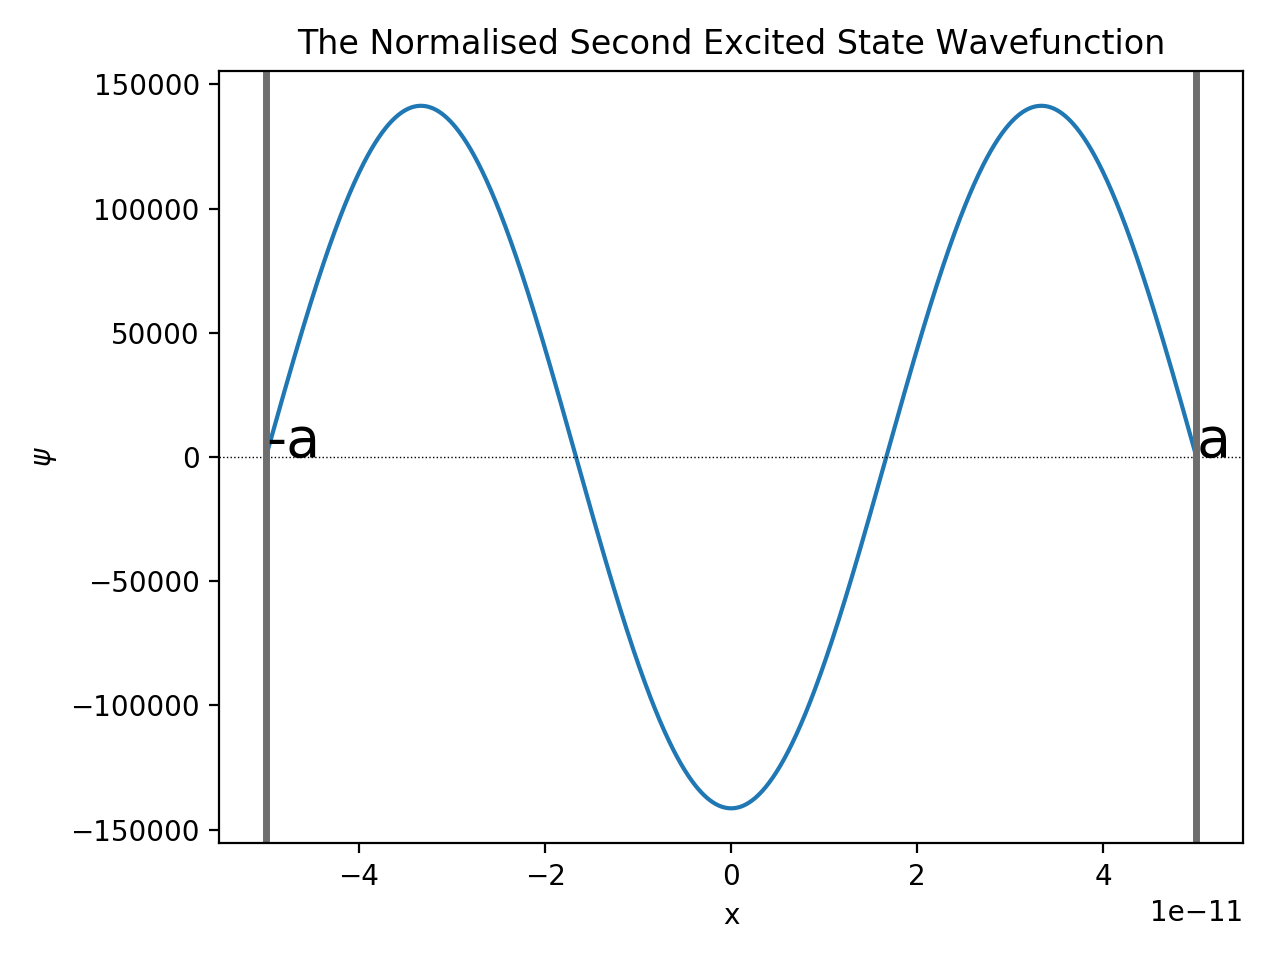

In [303]:
norm_wavefunction = Trapezoidal((bestsoln[0]),-a,a,N)

plt.figure()
plt.plot(xplotpoints,norm_wavefunction)
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("The Normalised Second Excited State Wavefunction")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)
plt.tight_layout()

In [304]:
def knownwf3(xpoints):
    V = []
    for x in xpoints:
        V.append((((1/np.sqrt(a))*np.cos((3*np.pi*x)/(2*a)))))
    return V

<IPython.core.display.Javascript object>


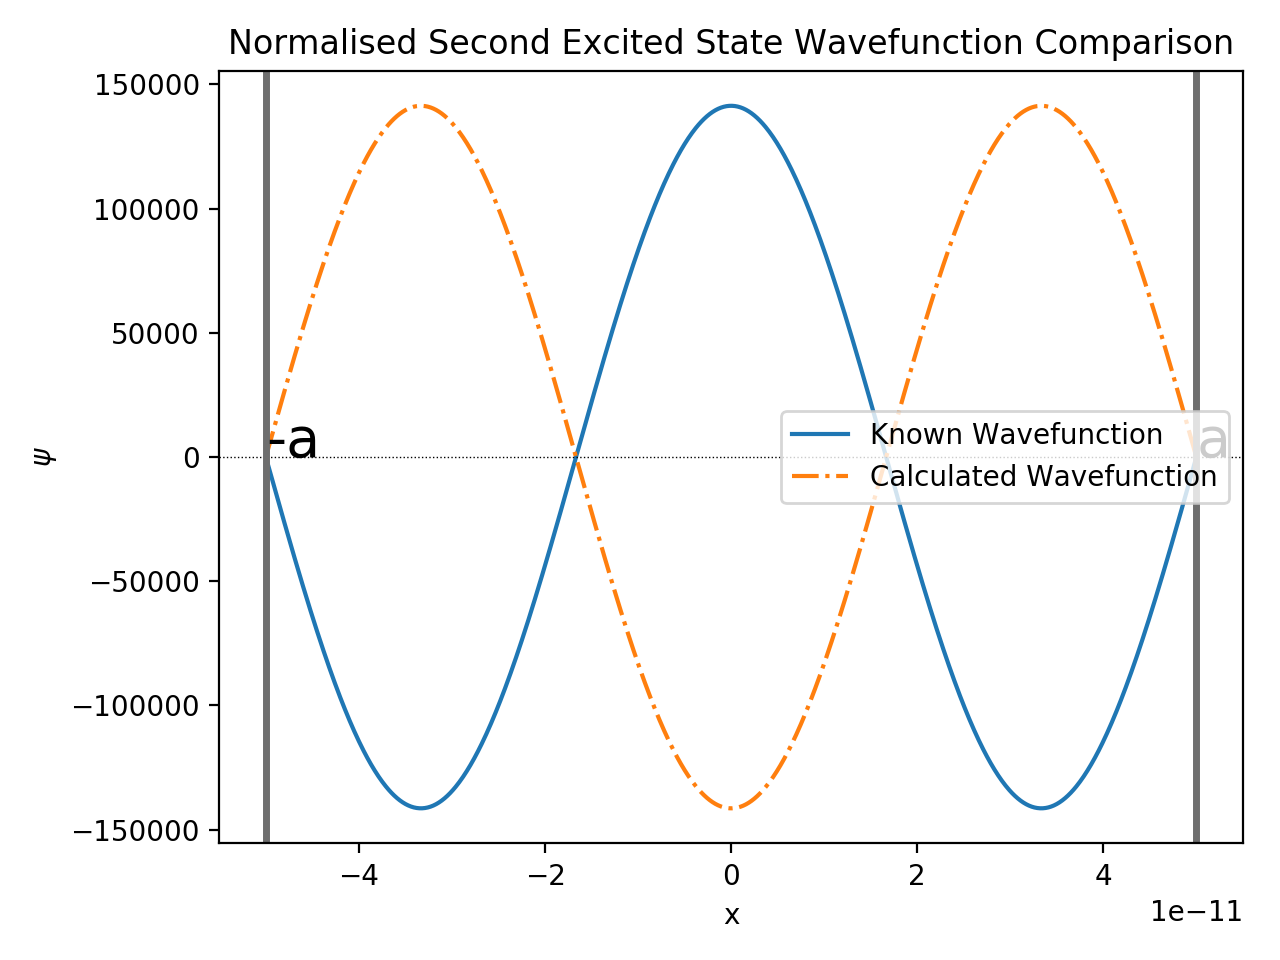

In [305]:
plt.figure()
plt.plot(xplotpoints,knownwf3(xplotpoints),label ='Known Wavefunction')
plt.plot(xplotpoints,norm_wavefunction,'-.',label = 'Calculated Wavefunction')
plt.legend()
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("Normalised Second Excited State Wavefunction Comparison")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)
plt.tight_layout()

### n = 3

In [306]:
E1 = 5e-18 # guess 1 of initial first excited state energy in J
E2 = 1e-16 # guess 2 of initial first excited state energy in J

n = 4 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3_third = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3_third
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]

E_check = ((np.pi**2)*(h_bar**2)*(n**2))/(2*m*((2*a)**2)) 

print('The analytical solution for the third excited state is',E_check,'J')
    
print('The third excited state energy that fulfills the boundary conditions is',E3_third,'J')

The analytical solution for the third excited state is 9.639467831238444e-17 J
The third excited state energy that fulfills the boundary conditions is 9.639467835265706e-17 J


<IPython.core.display.Javascript object>


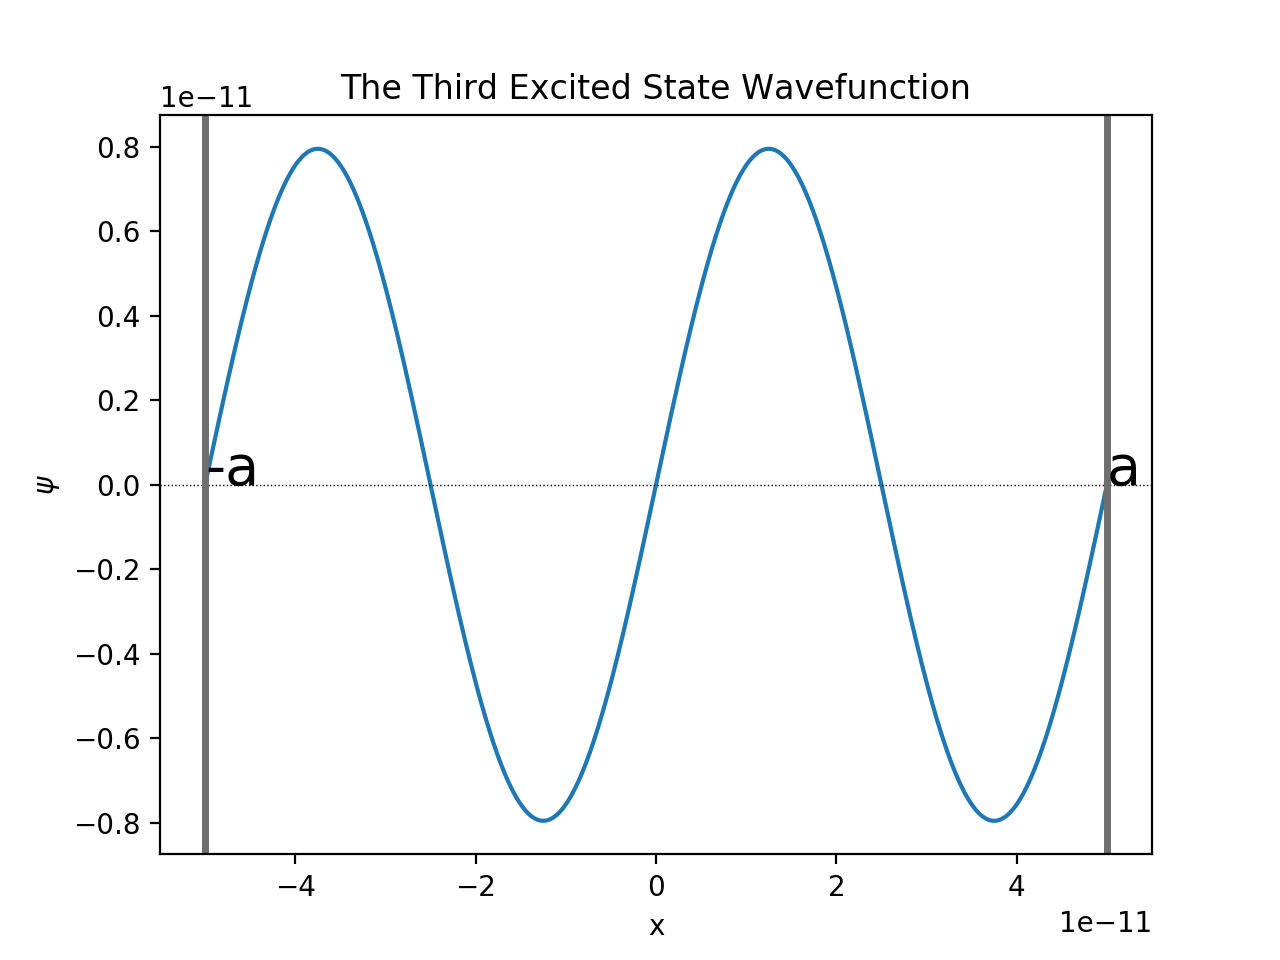

Text(5e-11,0,'a')

In [307]:
xplotpoints = np.arange(xstart, xend+h, h)

bestsoln = RungeKutta2d([0, 1],xpoints,rhs,E3_third)  # call this with the *calculation* tpoints array

# but *plot* it with the new xplotpoints array.
plt.figure()
plt.plot(xplotpoints,bestsoln[0])
#plt.legend()
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("The Third Excited State Wavefunction")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)

The value of the integral is 3.166286987410146e-33


<IPython.core.display.Javascript object>


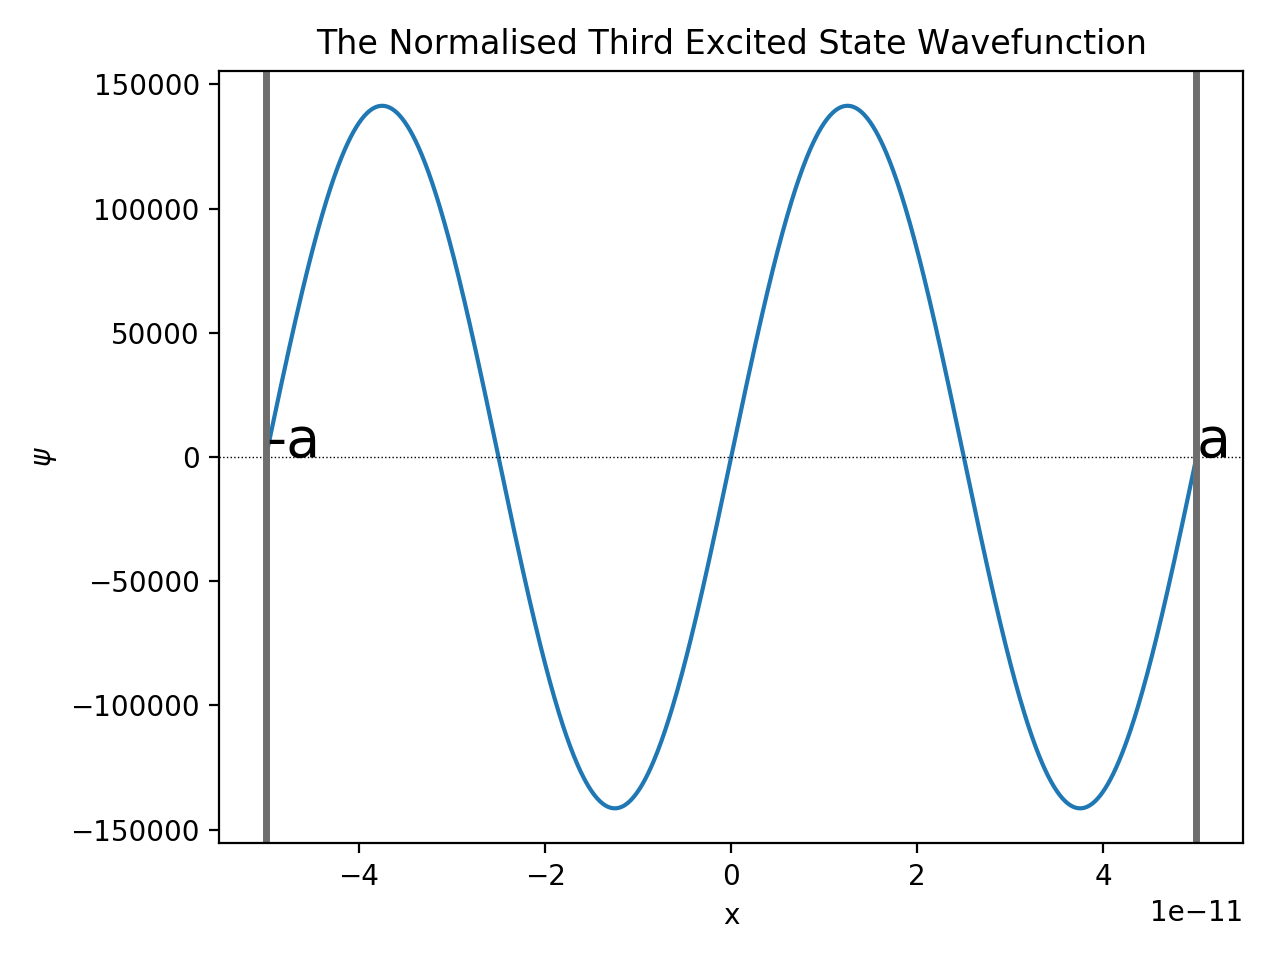

In [308]:
norm_wavefunction = Trapezoidal((bestsoln[0]),-a,a,N)

plt.figure()
plt.plot(xplotpoints,norm_wavefunction)
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("The Normalised Third Excited State Wavefunction")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)
plt.tight_layout()

In [309]:
def knownwf4(xpoints):
    V = []
    for x in xpoints:
        V.append((((1/np.sqrt(a))*np.sin((4*np.pi*x)/(2*a)))))
    return V

<IPython.core.display.Javascript object>


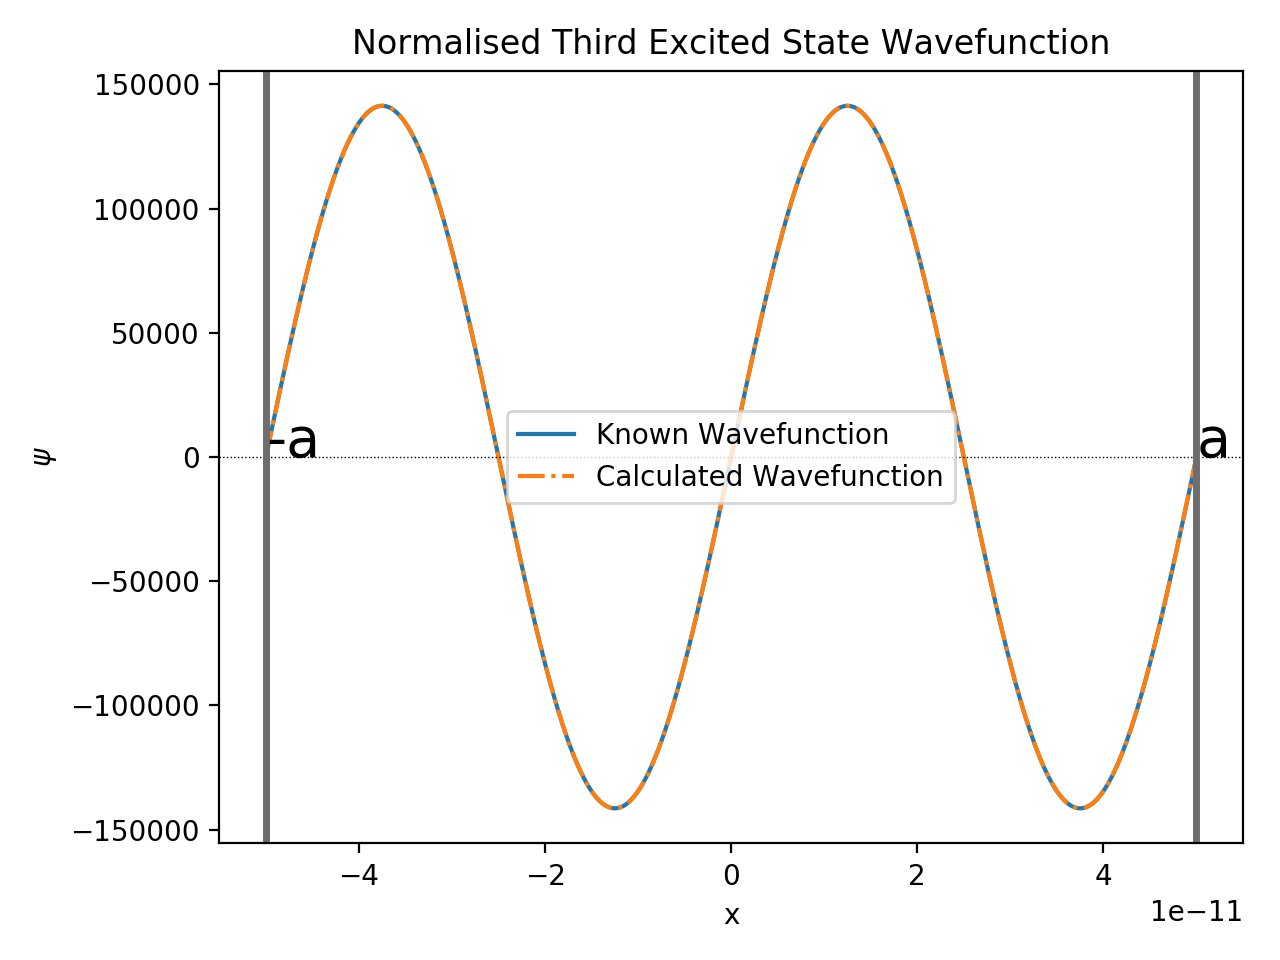

In [310]:
plt.figure()
plt.plot(xplotpoints,knownwf4(xplotpoints),label ='Known Wavefunction')
plt.plot(xplotpoints,norm_wavefunction,'-.',label = 'Calculated Wavefunction')
plt.legend()
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("Normalised Third Excited State Wavefunction")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)
plt.tight_layout()

In [311]:
E1 = 2e-15 # guess 1 of initial first excited state energy in J
E2 = 2.5e-15 # guess 2 of initial first excited state energy in J

n = 20 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3_20th = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3_20th
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]

E_check = ((np.pi**2)*(h_bar**2)*(n**2))/(2*m*((2*a)**2)) 

print('The analytical solution for the 20th excited state is',E_check,'J')
    
print('The 20th excited state energy that fulfills the boundary conditions is',E3_20th,'J')

The analytical solution for the 20th excited state is 2.409866957809611e-15 J
The 20th excited state energy that fulfills the boundary conditions is 2.6862835673704537e-16 J


In [312]:
E1 = 4e-15 # guess 1 of initial first excited state energy in J
E2 = 5e-15 # guess 2 of initial first excited state energy in J

n = 27 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3_27th = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3_27th
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]

E_check = ((np.pi**2)*(h_bar**2)*(n**2))/(2*m*((2*a)**2)) 

print('The analytical solution for the 20th excited state is',E_check,'J')
    
print('The 20th excited state energy that fulfills the boundary conditions is',E3_27th,'J')

The analytical solution for the 20th excited state is 4.391982530608016e-15 J
The 20th excited state energy that fulfills the boundary conditions is 4.723343937648926e-15 J


So if we try the same method for a much higher n, the secant method doesn't produce a valid result. Even if we pick initial guesses that are incredibly close to the correct E.

## The Finite Square Well

The next system we want to investigate is the finite square well embedded in the infinite square well. The potential will have the form:

$$
V_x = \begin{cases} 0 & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases} 
$$

We can calculate the eigenvalues and plot the wavefunctions in the same way as before.

In [313]:
### Making the well ###

a = 5*10**(-11) # half-width of the well in metres
N = 1000 # number of Runge-Kutta calculation points

v0 = 600*e

def V(x):
    if x >= (-a/2) and x <= (a/2):
        return 0
    elif abs(x) > a/2:
        return v0

In [314]:
E1 = 1e-19 # guess 1 of initial ground state energy in J
E2 = 1e-17 # guess 2 of initial ground state energy in J

n = 1 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3 = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]
    
print('The ground state energy that fulfills the boundary conditions is',E3/e,'eV')

The ground state energy that fulfills the boundary conditions is 85.66151943012733 eV


In [315]:
E1 = 1e-19 # guess 1 of initial ground state energy in J
E2 = 5e-17 # guess 2 of initial ground state energy in J

n = 1 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3_2 = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3_2
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]
    
print('The ground state energy that fulfills the boundary conditions is',E3_2/e,'eV')

The ground state energy that fulfills the boundary conditions is 328.86902175736947 eV


In [316]:
E1 = 1e-17 # guess 1 of initial ground state energy in J
E2 = 1e-16 # guess 2 of initial ground state energy in J

n = 1 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3_3 = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3_3
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]
    
print('The ground state energy that fulfills the boundary conditions is',E3_3/e,'eV')

The ground state energy that fulfills the boundary conditions is 670.1785607703212 eV


Now we can plot the potential itself with the energy eigenvalues as horizontal lines.

<IPython.core.display.Javascript object>


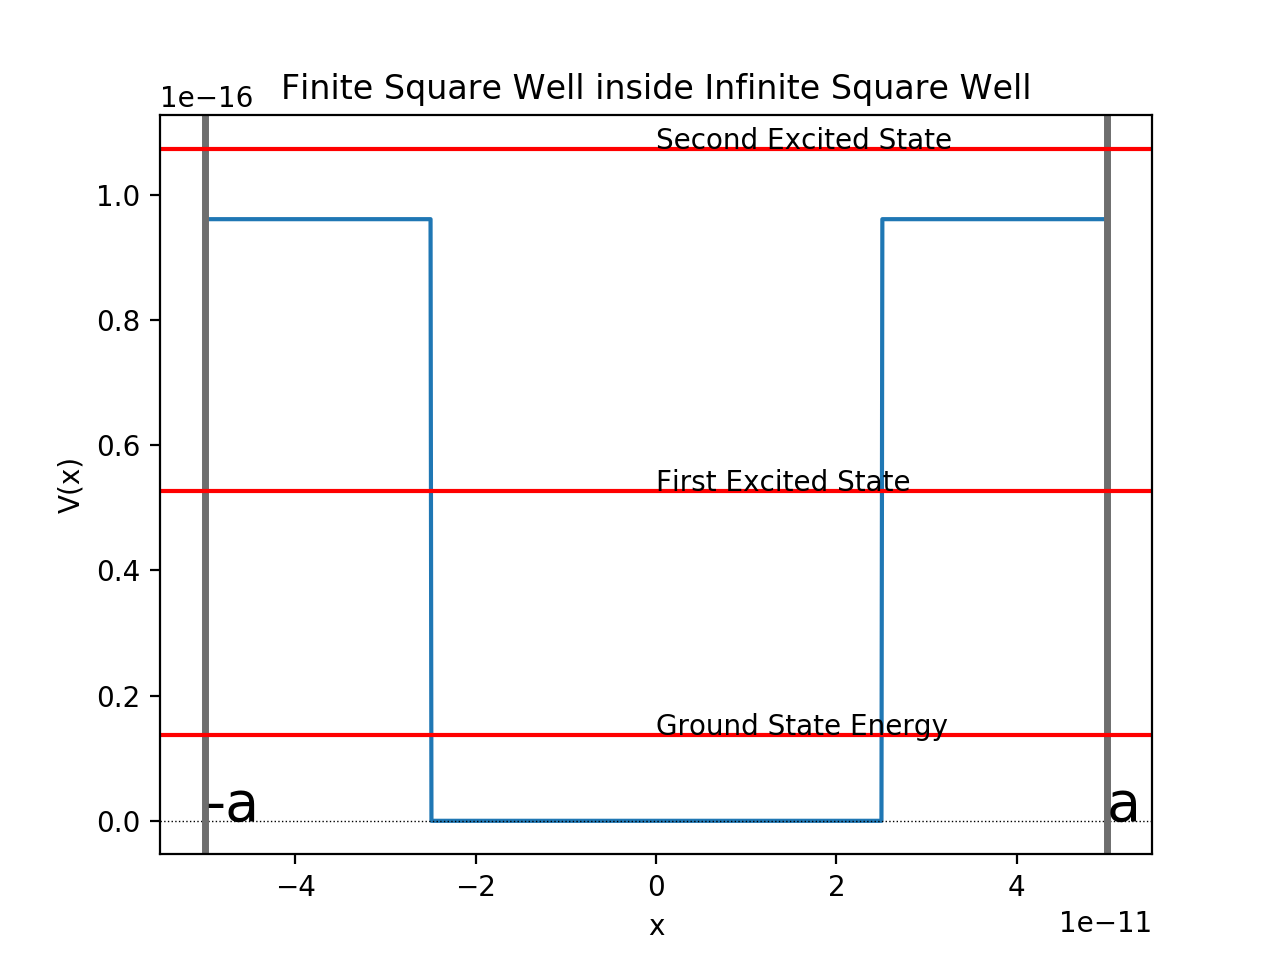

Text(5e-11,0,'a')

In [317]:
def V_fsw(xpoints):
    potential = []
    for x in xpoints:
        if x >= (-a/2) and x <= (a/2):
            V = 0
        elif abs(x) > a/2:
            V = v0
        potential.append(V)
    return np.array(potential)


xplotpoints = np.arange(xstart, xend+h, h)

#print(V_fsw(xplotpoints))
bestsoln = RungeKutta2d([0, 1],xpoints,rhs,E3)  # call this with the *calculation* tpoints array

# but *plot* it with the new xplotpoints array.
plt.figure()
plt.plot(xplotpoints,V_fsw(xplotpoints))
#plt.legend()
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("V(x)")
plt.title("Finite Square Well inside Infinite Square Well")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.axhline(y=E3, c = 'red')
plt.text(0,E3,'Ground State Energy')
plt.axhline(y=E3_2, c = 'red')
plt.text(0,E3_2,'First Excited State')
plt.axhline(y=E3_3, c = 'red')
plt.text(0,E3_3,'Second Excited State')
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)

The value of the integral is 1.4618811239142952e-30
The value of the integral is 1.5700079170184018e-31
The value of the integral is 1.9635698612620292e-32


<IPython.core.display.Javascript object>


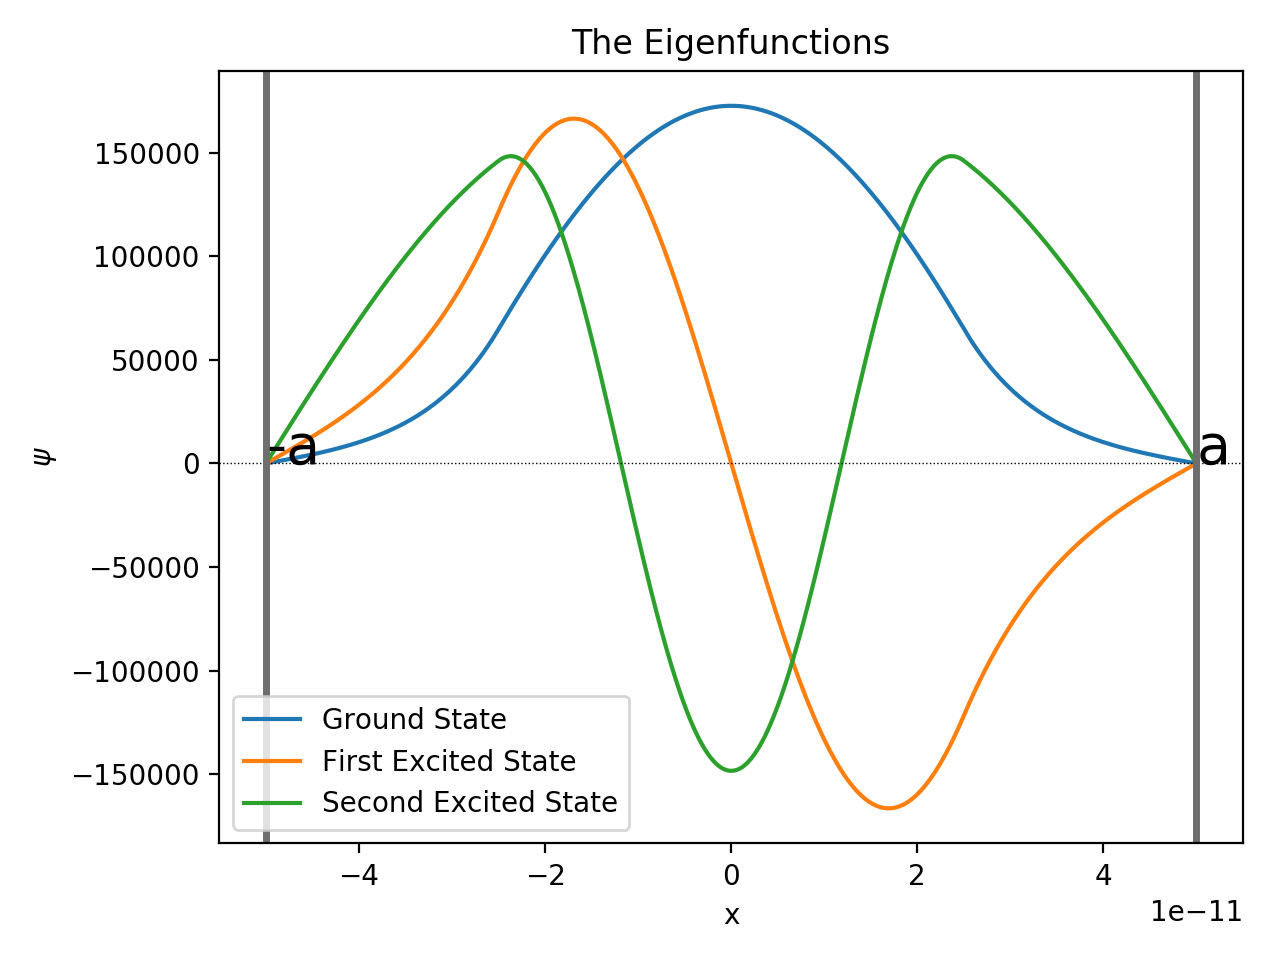

In [318]:
bestsoln1 = RungeKutta2d([0,1],xpoints,rhs,E3)
bestsoln3 = RungeKutta2d([0,1],xpoints,rhs,E3_3)  # call this with the *calculation* xpoints array
bestsoln2 = RungeKutta2d([0,1],xpoints,rhs,E3_2)

norm_wavefunction1 = Trapezoidal((bestsoln1[0]),-a,a,N) # transform the points into normalised wavefunction points
norm_wavefunction2 = Trapezoidal((bestsoln2[0]),-a,a,N)
norm_wavefunction3 = Trapezoidal((bestsoln3[0]),-a,a,N)

plt.figure()
plt.plot(xplotpoints,norm_wavefunction1,label = 'Ground State')
plt.plot(xplotpoints,norm_wavefunction2,label = 'First Excited State')
plt.plot(xplotpoints,norm_wavefunction3,label = 'Second Excited State')
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("The Eigenfunctions")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)
plt.tight_layout()
plt.legend()

The results are very similar to a normal finite square well. The more we increase v0 the more the system and its eigenfunctions start to look like the infinite square well (curves less bent) because the walls get taller. Increasing the width of the well decreases the energies of the eigenstates.

## Harmonic Potential

A harmonic potential embedded in the infinite square well will have the form:

$$
V(x) = V_0 \frac{x^2}{a^2}
$$

The eigenvalues and eigenfunctions are calculated the same way again.

In [319]:
v0 = 700*e

def V(x):
    v = v0*((x**2)/(a**2))
    return v

def V_harmonic(xpoints):
    potential2 = []
    for x in xpoints:
        v = v0*((x**2)/(a**2))
        potential2.append(v)
    return potential2

In [320]:
E1 = 1e-20 # guess 1 of initial ground state energy in J
E2 = 1e-17 # guess 2 of initial ground state energy in J

n = 1 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3 = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]
    
print('The ground state energy that fulfills the boundary conditions is',E3/e,'eV')

The ground state energy that fulfills the boundary conditions is 103.91852079682145 eV


In [321]:
E1 = 1e-19 # guess 1 of initial ground state energy in J
E2 = 5e-17 # guess 2 of initial ground state energy in J

n = 1 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3_2 = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3_2
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]
    
print('The ground state energy that fulfills the boundary conditions is',E3_2/e,'eV')

The ground state energy that fulfills the boundary conditions is 317.0086299868098 eV


In [322]:
E1 = 1e-18 # guess 1 of initial ground state energy in J
E2 = 1e-16 # guess 2 of initial ground state energy in J

n = 1 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3_3 = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3_3
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]
    
print('The ground state energy that fulfills the boundary conditions is',E3_3/e,'eV')

The ground state energy that fulfills the boundary conditions is 551.9027823590205 eV


<IPython.core.display.Javascript object>


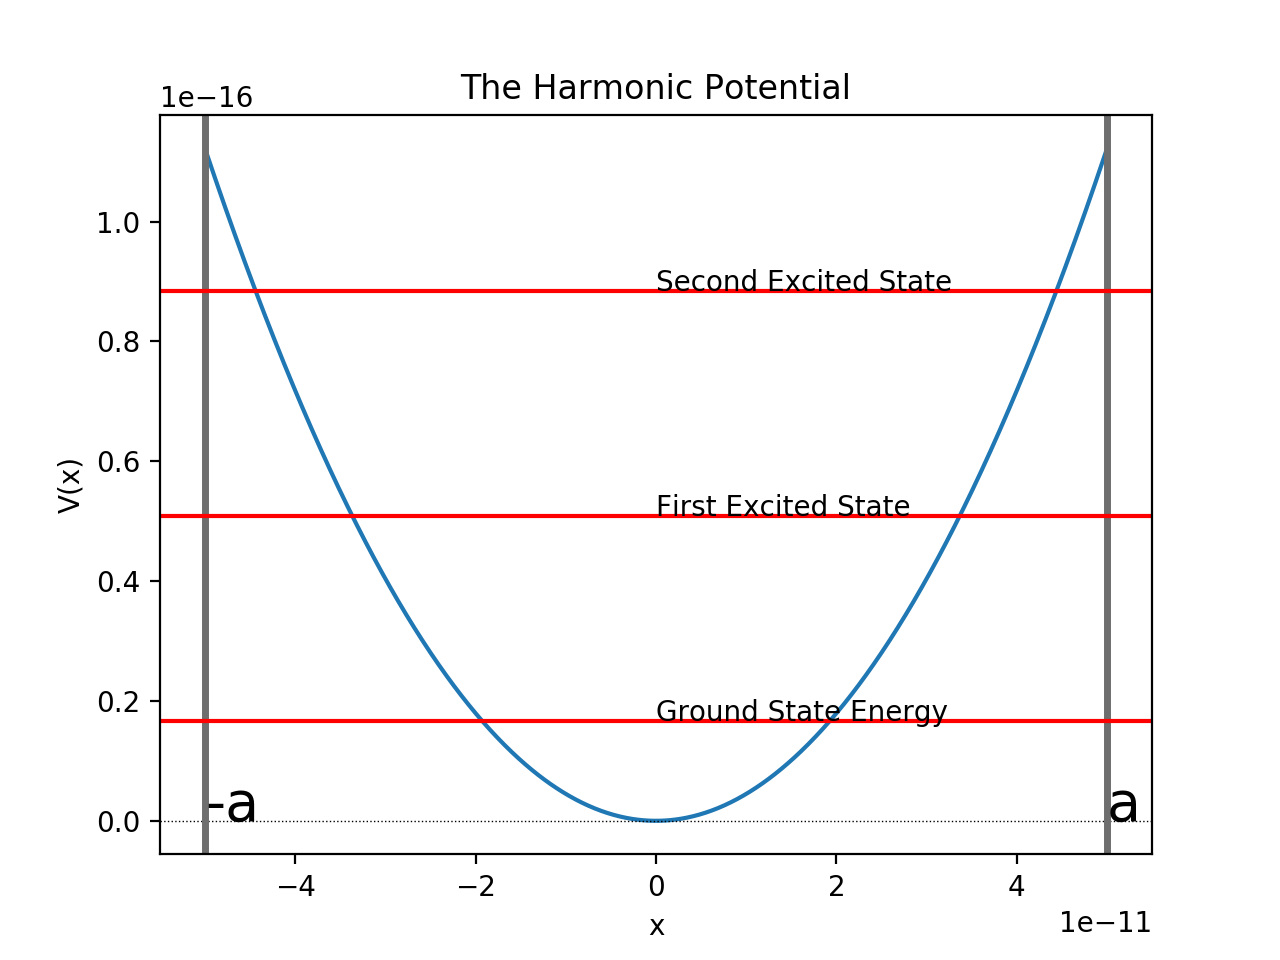

Text(5e-11,0,'a')

In [323]:
# but *plot* it with the new xplotpoints array.
plt.figure()
plt.plot(xplotpoints,V_harmonic(xplotpoints))
#plt.legend()
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("V(x)")
plt.title("The Harmonic Potential")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.axhline(y=E3, c = 'red')
plt.text(0,E3,'Ground State Energy')
plt.axhline(y=E3_2, c = 'red')
plt.text(0,E3_2,'First Excited State')
plt.axhline(y=E3_3, c = 'red')
plt.text(0,E3_3,'Second Excited State')
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)

The value of the integral is 4.856455196863326e-31
The value of the integral is 5.197090724334288e-32
The value of the integral is 1.2903890800244402e-32


<IPython.core.display.Javascript object>


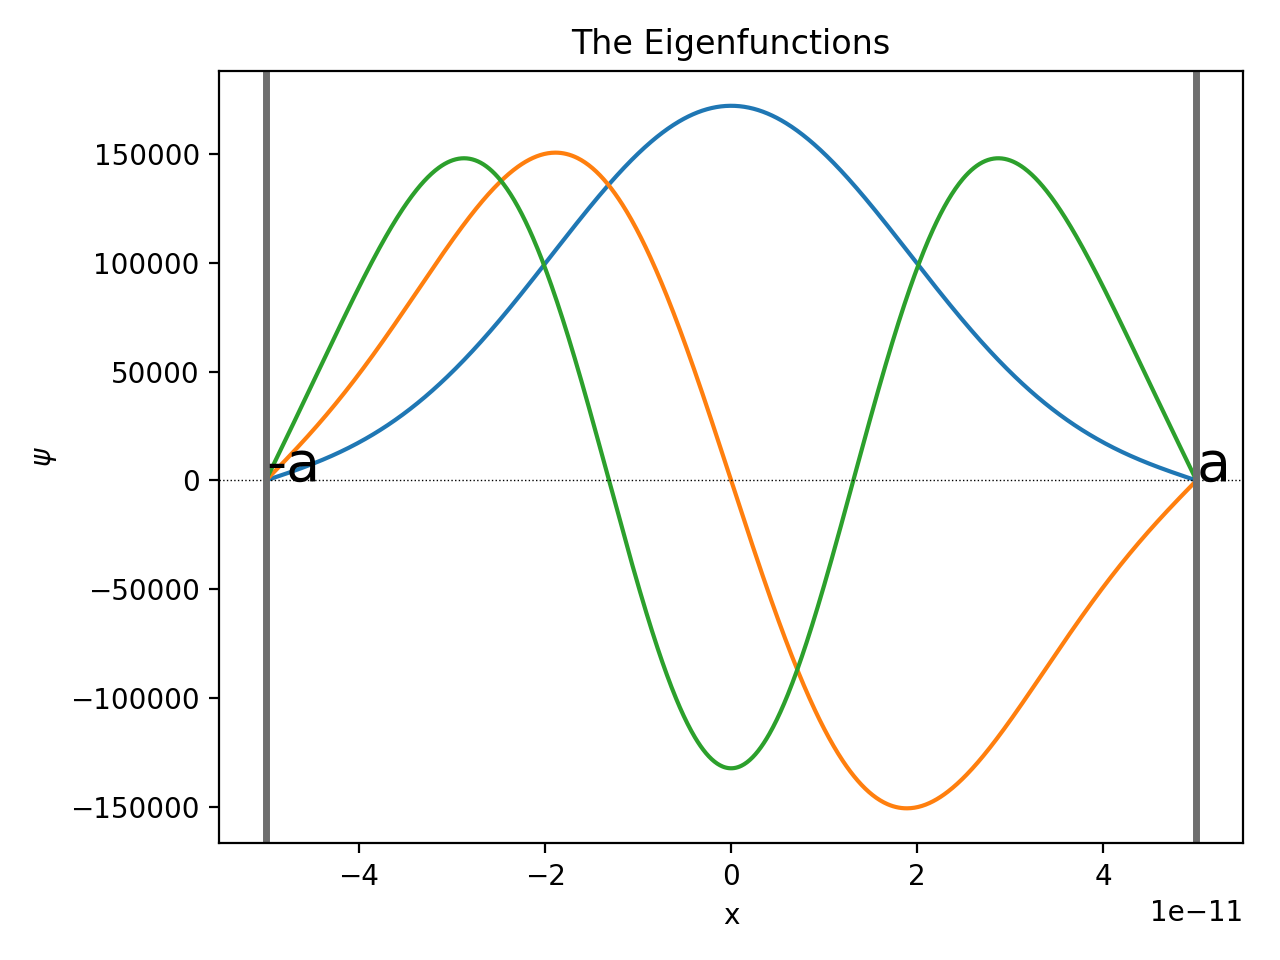

In [324]:
bestsoln1 = RungeKutta2d([0,1],xpoints,rhs,E3)
bestsoln3 = RungeKutta2d([0,1],xpoints,rhs,E3_3)  # call this with the *calculation* xpoints array
bestsoln2 = RungeKutta2d([0,1],xpoints,rhs,E3_2)

norm_wavefunction1 = Trapezoidal((bestsoln1[0]),-a,a,N)
norm_wavefunction2 = Trapezoidal((bestsoln2[0]),-a,a,N) # normalise wavefunctions
norm_wavefunction3 = Trapezoidal((bestsoln3[0]),-a,a,N)

plt.figure()
plt.plot(xplotpoints,norm_wavefunction1,label = 'Ground State')
plt.plot(xplotpoints,norm_wavefunction2,label = 'First Excited State')
plt.plot(xplotpoints,norm_wavefunction3,label = 'Second Excited State')
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("The Eigenfunctions")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)
plt.tight_layout()


## The Double Finite Square Well

Another interesting potential to plot is the double finite square well which has the form:

$$
V_x = \begin{cases} 0 & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_0  & \text{if } x > a/2, \\ 
    V_0 & \text{if } x < -a/2 \end{cases} 
$$

This case could represent an electron in a diatomic molecule where the 2 wells represent the attractive force of the 2 nuclei.

In [325]:
v0 = 600*e

def V(x):
    if x > 0 and x > a/2:
        v = v0
    elif x < 0 and x > -a/2:
        v = v0
    else:
        v = 0
    return v

In [331]:
E1 = 1e-20 # guess 1 of initial ground state energy in J
E2 = 1e-17 # guess 2 of initial ground state energy in J

n = 1 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3 = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]
    
print('The ground state energy that fulfills the boundary conditions is',E3/e,'eV')

The ground state energy that fulfills the boundary conditions is 212.00659592241738 eV


In [344]:
E1 = 1e-20 # guess 1 of initial ground state energy in J
E2 = 6e-17 # guess 2 of initial ground state energy in J

n = 1 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3_2 = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3_2
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]

E_check = (h_bar**2)/(2*m)

print('The analytical solution for the first excited state is',E_check,'J')
    
print('The ground state energy that fulfills the boundary conditions is',E3_2/e,'eV')

The analytical solution for the first excited state is 6.104264314645735e-39 J
The ground state energy that fulfills the boundary conditions is 328.5734152779549 eV


In [345]:
E1 = 1e-18 # guess 1 of initial ground state energy in J
E2 = 1e-16 # guess 2 of initial ground state energy in J

n = 1 #state number

# basic variables
xstart = -a # start x
xend = +a  # end x
N = 1000     # number of points for Runge-Kutta
h = 2*a/N  # step length

xpoints = np.arange(xstart, xend, h)

r = np.array([0,1])
soln1 = RungeKutta2d(r,xpoints,rhs,E1) # the whole array of solutions
final1 = soln1[0,N]

#print(xpoints)


# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
final2 = RungeKutta2d(np.array([0, 1]),xpoints,rhs,E2)[0,N]


### now for the secant method to converge on the right answer:

tolerance = e/1000                # set the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3_3 = E2 - final2*(E2-E1)/(final2-final1)  
    # update initial energies for the next iteration
    E1 = E2 
    E2 = E3_3
    # and recalculate final elements
    final1 = RungeKutta2d(np.array([0, E1]),xpoints,rhs,E1)[0,N]
    final2 = RungeKutta2d(np.array([0, E2]),xpoints,rhs,E2)[0,N]
    
print('The ground state energy that fulfills the boundary conditions is',E3_3/e,'eV')

The ground state energy that fulfills the boundary conditions is 691.6501843701828 eV


<IPython.core.display.Javascript object>


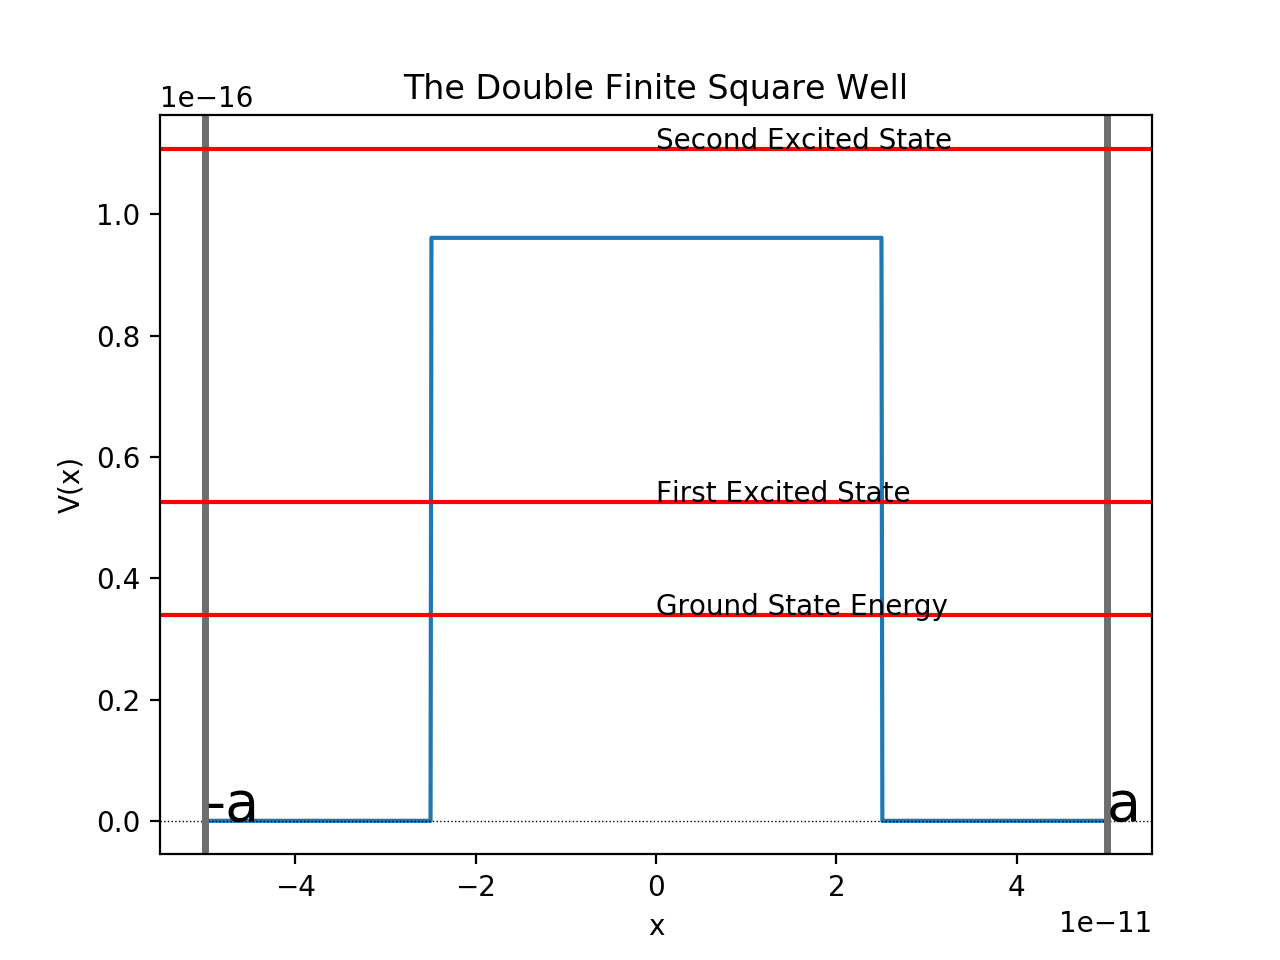

Text(5e-11,0,'a')

In [347]:
def V_doublefsw(xpoints):
    potential2 = []
    for x in xpoints:
        if x > 0 and x < a/2:
            v = v0
        elif x < 0 and x > -a/2:
            v = v0
        else:
            v = 0
        potential2.append(v)
    return potential2

xplotpoints = np.arange(xstart, xend+h, h)


# but *plot* it with the new xplotpoints array.
plt.figure()
plt.plot(xplotpoints,V_doublefsw(xplotpoints))
#plt.legend()
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("V(x)")
plt.title("The Double Finite Square Well")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.axhline(y=E3, c = 'red')
plt.text(0,E3,'Ground State Energy')
plt.axhline(y=E3_2, c = 'red')
plt.text(0,E3_2,'First Excited State')
plt.axhline(y=E3_3, c = 'red')
plt.text(0,E3_3,'Second Excited State')
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)


The value of the integral is 2.4557972612615815e-31
The value of the integral is 2.1479982383129928e-33
The value of the integral is 1.3777493474944531e-32


<IPython.core.display.Javascript object>


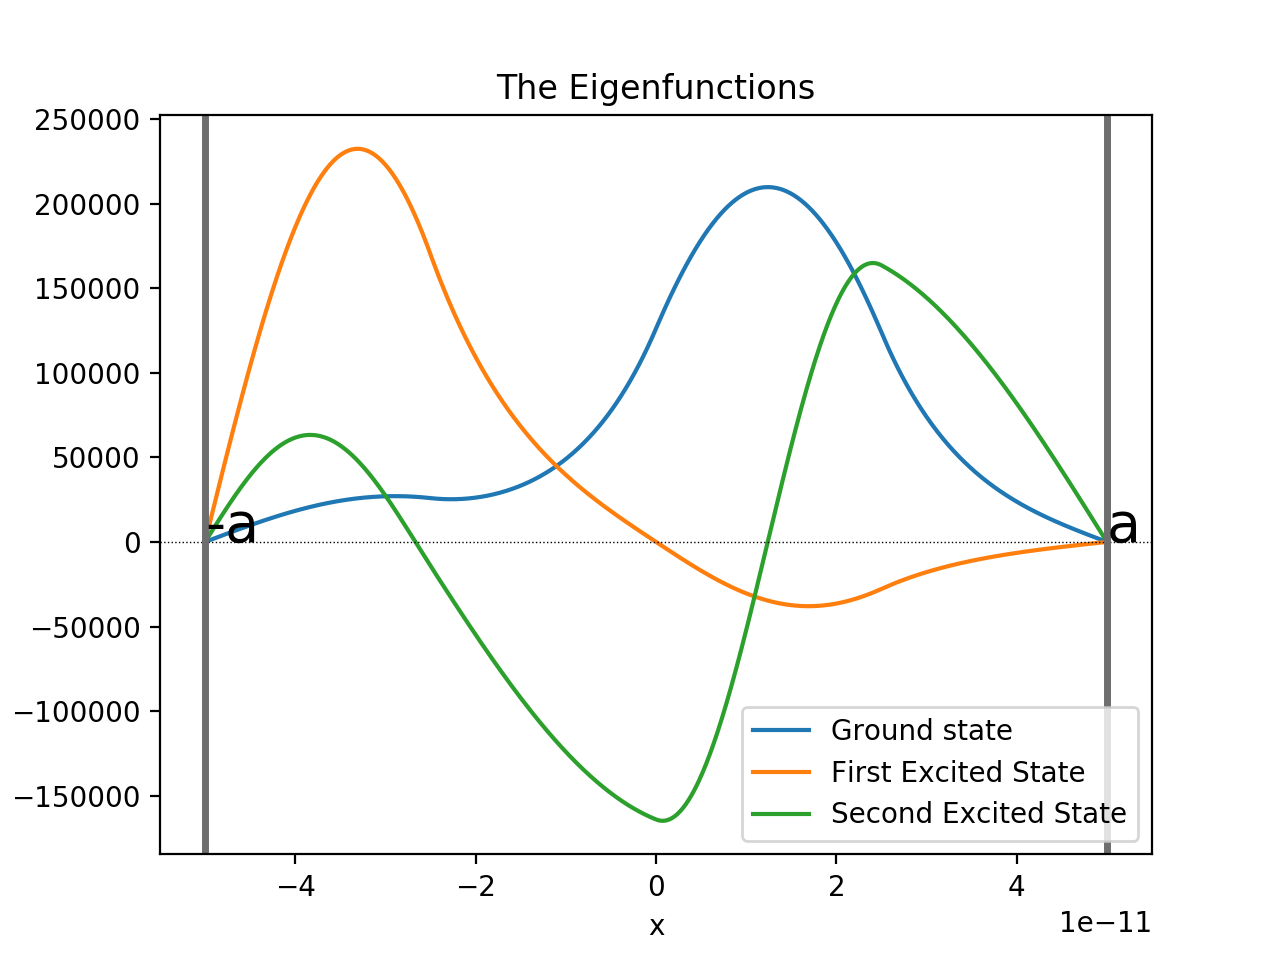

In [348]:
bestsoln1 = RungeKutta2d([0,1],xpoints,rhs,E3)
bestsoln3 = RungeKutta2d([0,1],xpoints,rhs,E3_3)  # call this with the *calculation* xpoints array
bestsoln2 = RungeKutta2d([0,1],xpoints,rhs,E3_2)
norm_wavefunction1 = Trapezoidal((bestsoln1[0]),-a,a,N)
norm_wavefunction2 = Trapezoidal((bestsoln2[0]),-a,a,N) # normalise wavefunctions
norm_wavefunction3 = Trapezoidal((bestsoln3[0]),-a,a,N)

plt.figure()
plt.plot(xplotpoints,norm_wavefunction1,label = 'Ground state')
plt.plot(xplotpoints,norm_wavefunction2,label = 'First Excited State')
plt.plot(xplotpoints,norm_wavefunction3,label = 'Second Excited State')
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("The Eigenfunctions")
plt.axvline(x=-a, c = "#6e6e6e",ls="-",lw=2.5) #represents the walls of the infinite square well
plt.axvline(x=a, c = "#6e6e6e",ls="-",lw=2.5)
plt.text(-a,0,'-a',fontsize = 20)
plt.text(a,0,'a',fontsize = 20)
plt.legend()

